In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# plotting
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = list(np.ravel(june_results))
print(june_temps)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['June Temperatures'])
print(june_df)

      June Temperatures
0                  78.0
1                  76.0
2                  78.0
3                  76.0
4                  77.0
...                 ...
1695               79.0
1696               74.0
1697               74.0
1698               76.0
1699               75.0

[1700 rows x 1 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(dec_results))
print(dec_temps)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps, columns=['December Temperatures'])
print(dec_df)

      December Temperatures
0                      76.0
1                      74.0
2                      74.0
3                      64.0
4                      64.0
...                     ...
1512                   71.0
1513                   71.0
1514                   69.0
1515                   65.0
1516                   65.0

[1517 rows x 1 columns]


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
june_descriptive = june_df.describe()
dec_descriptive = dec_df.describe()
june_december_describe = june_descriptive.merge(dec_descriptive, left_index=True, right_index=True)
print(june_december_describe)

       June Temperatures  December Temperatures
count        1700.000000            1517.000000
mean           74.944118              71.041529
std             3.257417               3.745920
min            64.000000              56.000000
25%            73.000000              69.000000
50%            75.000000              71.000000
75%            77.000000              74.000000
max            85.000000              83.000000


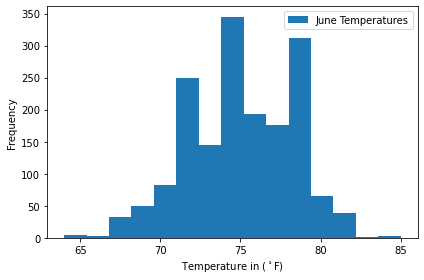

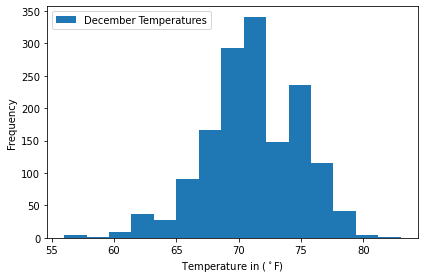

In [13]:
june_df.plot.hist(bins=15)
plt.xlabel("Temperature in ($^\circ$F)")
plt.tight_layout()

dec_df.plot.hist(bins=15)
plt.xlabel("Temperature in ($^\circ$F)")
plt.tight_layout()

In [14]:
june_matching_sample = june_df.sample(n=1500,replace=False)

In [15]:
june_matching_sample.describe()

,June Temperatures
count,1500.000000
mean,74.933333
std,3.276591
min,64.000000
25%,72.000000
50%,75.000000
75%,77.000000
max,85.000000


In [16]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [17]:
june_below_avg_temps = session.query(Measurement.tobs, Measurement.date).filter(extract('month', Measurement.date)==6).filter(Measurement.tobs <= 73.10).all()

In [19]:
june_below_avg_temps_df = pd.DataFrame(june_below_avg_temps, columns=['temps','date'])
june_below_avg_temps_df.set_index(june_below_avg_temps_df['date'], inplace=True)
print(june_below_avg_temps_df.drop(['date'], axis=1))

            temps
date             
2011-06-03   73.0
2011-06-04   70.0
2012-06-25   73.0
2012-06-26   73.0
2013-06-20   73.0
...           ...
2017-06-10   72.0
2017-06-13   73.0
2017-06-17   72.0
2017-06-23   71.0
2017-06-24   73.0

[565 rows x 1 columns]


In [20]:
june_below_avg_temps_df.count()

temps    565
date     565
dtype: int64

In [21]:
dec_below_avg_temps = session.query(Measurement.tobs, Measurement.date).filter(extract('month', Measurement.date)==12).filter(Measurement.tobs <= 73.10).all()

In [22]:
dec_below_avg_temps_df = pd.DataFrame(dec_below_avg_temps, columns=['temps','date'])
dec_below_avg_temps_df.set_index(dec_below_avg_temps_df['date'], inplace=True)
print(dec_below_avg_temps_df.drop(['date'], axis=1))

            temps
date             
2010-12-06   64.0
2010-12-07   64.0
2010-12-08   67.0
2010-12-10   66.0
2010-12-11   69.0
...           ...
2016-12-27   71.0
2016-12-28   71.0
2016-12-29   69.0
2016-12-30   65.0
2016-12-31   65.0

[1118 rows x 1 columns]


In [23]:
dec_below_avg_temps_df.count()

temps    1118
date     1118
dtype: int64